In [ ]:
! pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download jangedoo/utkface-new

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 329M/331M [00:11<00:00, 28.8MB/s]
100% 331M/331M [00:11<00:00, 29.4MB/s]


In [ ]:
import os
! unzip utkface-new

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import os
import shutil

utkface_path = '/content/crop_part1'  
trial_path = '/content/Trial'

# Create the trial directory if it doesn't already exist
if not os.path.exists(trial_path):
    os.mkdir(trial_path)
ages = range(1, 80)
genders = [0, 1]
max_num_files = 25

for age in ages:
    for gender in genders:
        age_gender_files = [f for f in os.listdir(utkface_path) if f.startswith(f"{age}_{gender}_")]
        num_files = min(len(age_gender_files), max_num_files)
        for i in range(num_files):
            source_path = os.path.join(utkface_path, age_gender_files[i])
            dest_path = os.path.join(trial_path, age_gender_files[i])
            shutil.copy(source_path, dest_path)


In [ ]:
import cv2
import numpy as np
import os
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
import tensorflow as tf
from numpy import savez_compressed
from sklearn.model_selection import train_test_split

image_dir = "/content/Trial/"
files = os.listdir(image_dir)
size = len(files)
print("Total samples:",size)

Total samples: 3621


In [ ]:
from keras.layers import Input
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
kitty = []
ages = []
genders = []
for filename in files:
    image = cv2.imread(image_dir + filename, 1)
    image = cv2.resize(image,dsize=(224,224))
    kitty.append(image)
    ages.append(filename.split('_')[0])
    genders.append(int(filename.split('_')[1]))
       

In [ ]:
len(kitty)

3621

In [ ]:
from google.colab.patches import cv2_imshow
size_kitty = len(kitty)
size_genders = len(genders)
print("Total samples:",size_kitty)

def display1(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 206
sample = kitty[idx]
display(sample)

Total samples: 3621


array([[[116, 135, 173],
        [119, 138, 176],
        [126, 145, 183],
        ...,
        [180, 169, 171],
        [197, 187, 188],
        [206, 195, 197]],

       [[117, 136, 174],
        [120, 139, 177],
        [126, 146, 184],
        ...,
        [171, 160, 163],
        [189, 178, 181],
        [200, 189, 191]],

       [[118, 137, 175],
        [122, 141, 179],
        [128, 147, 185],
        ...,
        [161, 150, 152],
        [181, 170, 172],
        [194, 183, 185]],

       ...,

       [[ 23,  18,  19],
        [ 22,  17,  18],
        [ 21,  16,  17],
        ...,
        [ 48,  31,  28],
        [ 50,  31,  28],
        [ 51,  32,  29]],

       [[ 23,  18,  19],
        [ 22,  17,  18],
        [ 22,  16,  17],
        ...,
        [ 48,  30,  27],
        [ 50,  31,  28],
        [ 51,  32,  29]],

       [[ 23,  18,  19],
        [ 22,  17,  18],
        [ 22,  16,  17],
        ...,
        [ 48,  30,  27],
        [ 51,  32,  29],
        [ 51,  32,  29]]

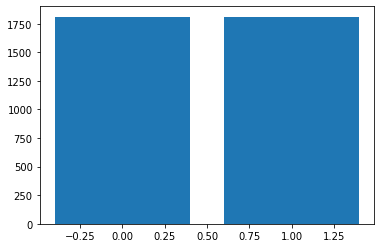

Max value: 1


In [ ]:
import matplotlib.pyplot as plt
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(x_genders,y_genders)
plt.show()
print("Max value:",max(genders))

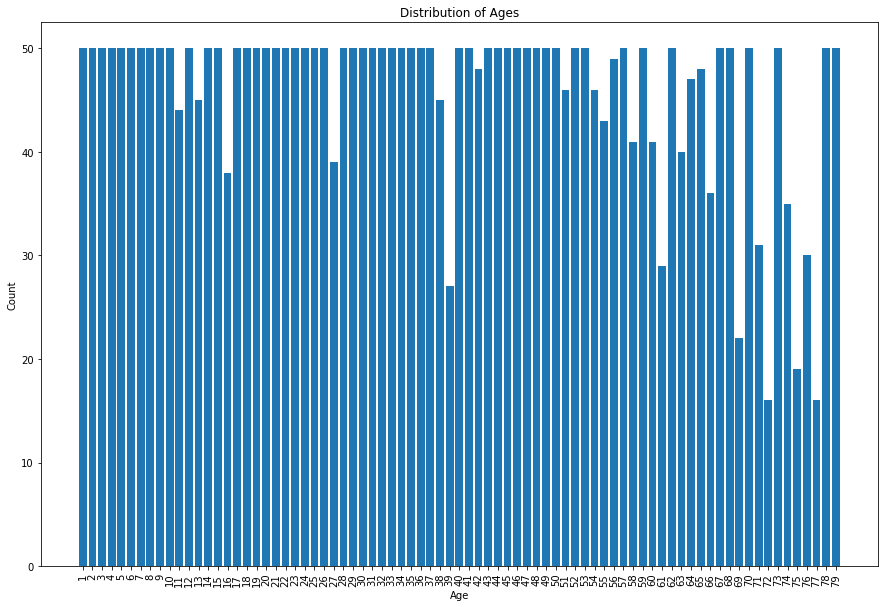

Max value: 9


In [ ]:
import matplotlib.pyplot as plt

# Sort the ages as integers
distribution_list = list(set(ages))
distribution_list_int = [int(s) for s in distribution_list]
distribution_list_sorted = sorted(distribution_list_int)

# Convert sorted integers back to strings with leading zeros
ages_sorted = [str(i).zfill(1) for i in distribution_list_sorted]

x_ages = list(set(ages_sorted))
x_ages = sorted(x_ages)
y_ages = [ages.count(i) for i in x_ages]

plt.figure(figsize=(15, 10)) # set the size of the figure
plt.bar(ages_sorted, y_ages)

plt.xticks(rotation=90) # rotate the x-axis labels by 90 degrees
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

plt.show()

print("Max value:", max(ages))


Gender: 1 Age: 66


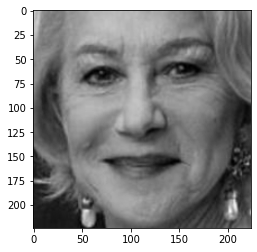

In [ ]:
def display(img):
    plt.imshow(img[:,:,1])
    plt.set_cmap('gray')
    plt.show()
idx = 207
sample = kitty[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [ ]:
target = np.zeros((size_genders,1),dtype='float32')
features = np.zeros((size_kitty,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size_kitty):
    target[i, 0] = int(genders[i])
    features[i] = kitty[i]
features = features / 255

In [ ]:
len(genders)

3621

In [ ]:
print(target)
print(size)
print(len(target))
print(target.shape)
print ("features")
print(len(features))
print(features.shape)

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
3621
3621
(3621, 1)
features
3621
(3621, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(len(x_train))
print(len(x_test))
print ("y_train")
print(y_train.shape)
print(y_test.shape)
print(len(y_train))
print(len(y_test))


(2896, 224, 224, 3)
(725, 224, 224, 3)
2896
725
y_train
(2896, 1)
(725, 1)
2896
725


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, ReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224,3))
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

predictions = Dense(1, activation='sigmoid')(x)

my_model = Model(inputs=inputs, outputs=predictions)
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

my_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 256)               38535424  
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256

In [ ]:
# avoid overfitting
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]

history = my_model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=45,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks,
                    verbose=1)


Epoch 1/45
23/23 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.7762
Epoch 1: val_loss improved from inf to 0.44141, saving model to best_model.h5
23/23 [==============================] - 4s 166ms/step - loss: 0.4624 - accuracy: 0.7762 - val_loss: 0.4414 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 2/45
23/23 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.7945
Epoch 2: val_loss improved from 0.44141 to 0.42247, saving model to best_model.h5
23/23 [==============================] - 3s 148ms/step - loss: 0.4463 - accuracy: 0.7945 - val_loss: 0.4225 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 3/45
23/23 [==============================] - ETA: 0s - loss: 0.4467 - accuracy: 0.7800
Epoch 3: val_loss improved from 0.42247 to 0.42183, saving model to best_model.h5
23/23 [==============================] - 3s 149ms/step - loss: 0.4467 - accuracy: 0.7800 - val_loss: 0.4218 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 4/45
23/23 [==========================

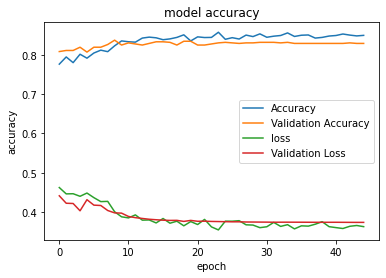

In [ ]:
history1 = history
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

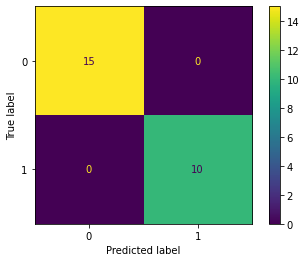

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a random classification dataset
X, y = make_classification(random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate a logistic regression model
clf = LogisticRegression(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Compute the confusion matrix on the test set
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


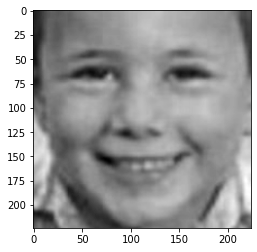

Actual Gender: Male
1/1 [==============================] - 0s 168ms/step
Values: [[0.2866935]] 
Predicted Gender: Male


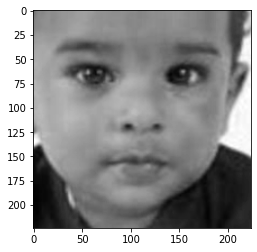

Actual Gender: Female
1/1 [==============================] - 0s 21ms/step
Values: [[0.4727527]] 
Predicted Gender: Male


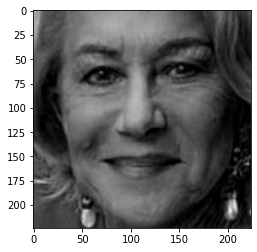

Actual Gender: Female
1/1 [==============================] - 0s 25ms/step
Values: [[0.9189615]] 
Predicted Gender: Female


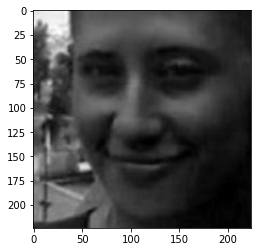

Actual Gender: Female
1/1 [==============================] - 0s 22ms/step
Values: [[0.4103533]] 
Predicted Gender: Male


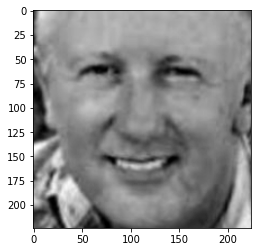

Actual Gender: Male
1/1 [==============================] - 0s 30ms/step
Values: [[0.1279322]] 
Predicted Gender: Male


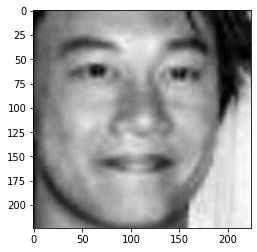

Actual Gender: Male
1/1 [==============================] - 0s 34ms/step
Values: [[0.2799341]] 
Predicted Gender: Male


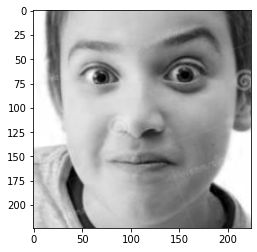

Actual Gender: Male
1/1 [==============================] - 0s 19ms/step
Values: [[0.19692568]] 
Predicted Gender: Male


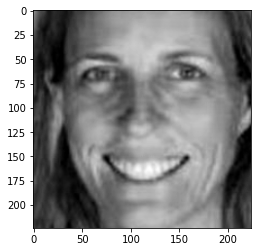

Actual Gender: Female
1/1 [==============================] - 0s 19ms/step
Values: [[0.8202122]] 
Predicted Gender: Female


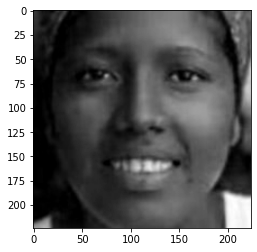

Actual Gender: Female
1/1 [==============================] - 0s 19ms/step
Values: [[0.8996673]] 
Predicted Gender: Female


In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = my_model.predict( np.array([ sample ]) )
    gender = get_gender(val[0])
    print("Values:",val,"\nPredicted Gender:",gender)
    
    
indexes = [900,206,207,5,546,18,48,236,76]
for idx in indexes:
    sample = kitty[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]))
    res = get_result(sample)